# Profile

**NumPy**之于数值计算特别重要的原因之一，是因为它可以高效处理大数组的数据。这是因为：

* NumPy是在一个连续的内存块中存储数据，独立于其他Python内置对象。NumPy的`C语言`编写的算法库可以操作内存，而不必进行类型检查或其它前期工作。比起Python的内置序列，NumPy数组使用的内存更少。
* NumPy可以在整个数组上执行复杂的计算，而不需要Python的for循环。
要搞明白具体的性能差距，考察一个包含一百万整数的数组，和一个等价的Python列表：


In [7]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))


In [8]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 36 ms


In [9]:
 %time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 832 ms


## 4.1 NumPy的ndarray：一种多维数组对象

NumPy最重要的一个特点就是其`N维数组对象`（即*ndarray*），该对象是一个快速而灵活的大数据集容器。你可以利用这种数组对整块数据执行一些数学运算，其语法跟标量元素之间的运算一样。

Python是如何利用与`标量值`类似的语法进行批次计算?

In [10]:
import numpy as np
# 2 rows 3 columns
data = np.random.randn(2, 3)

data

array([[-1.53714201,  1.89816175, -0.85632408],
       [-0.50756988,  0.60757962, -0.45953449]])

In [11]:
data * 10

array([[-15.37142008,  18.98161754,  -8.56324079],
       [ -5.07569882,   6.07579617,  -4.59534486]])

In [12]:
data + data

array([[-3.07428402,  3.79632351, -1.71264816],
       [-1.01513976,  1.21515923, -0.91906897]])

**ndarray**是一个通用的同构数据多维容器，也就是说，其中的所有元素必须是相同类型的。
每个数组都有一个**shape**（一个表示各维度大小的`元组`）和
一个**dtype**（一个用于说明数组`数据类型`的对象）：

In [13]:
data.shape

(2, 3)

In [14]:
data.dtype

dtype('float64')

> 精通`面向数组`的编程和思维方式是成为Python科学计算牛人的一大关键步骤。
“数组”、“NumPy数组”、"ndarray"时，基本上都指的是同一样东西，即ndarray对象。

### 创建ndarray
创建数组最简单的办法就是使用`array`函数。它接受一切序列型的对象（包括其他数组），
然后产生一个新的含有传入数据的NumPy数组。以一个列表的转换为例：

In [15]:
data1 = [6, 7.5, 8, 0, 1]

arr1 = np.array(data1)

arr1

array([6. , 7.5, 8. , 0. , 1. ])

**嵌套序列**（比如由一组等长列表组成的列表）将会被转换为一个`多维数组`：

In [16]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

arr2 = np.array(data2)

arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

NumPy数组arr2的两个维度的shape是从data2引入的。可以用属性ndim和shape验证：

In [17]:
arr2.ndim

2

In [18]:
arr2.shape

(2, 4)

np.array会尝试为新建的这个数组推断出一个较为合适的数据类型。
数据类型保存在一个特殊的`dtype`对象中。比如说，在上面的两个例子中，我们有：

In [19]:
arr1.dtype

dtype('float64')

In [20]:
arr2.dtype

dtype('int32')

zeros和ones分别可以创建指定长度或形状的全0或全1数组。
`empty`可以创建一个没有任何具体值的数组。
要用这些方法创建多维数组，只需传入一个表示形状的元组(m, n)即可：

In [21]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
np.zeros((3, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [23]:
np.empty((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

> 注意：认为np.empty会返回全0数组的想法是不安全的。
很多情况下（如前所示），它返回的都是一些**未初始化**的垃圾值。

In [24]:
# arange是Python内置函数range的数组版：
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

表4-1列出了一些数组创建函数。由于NumPy关注的是数值计算，因此，如果没有特别指定，数据类型基本都是`float64`（浮点数）。
![4-1](https://upload-images.jianshu.io/upload_images/7178691-78ab11f67e7077a6.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/696)

### ndarray的数据类型
dtype（数据类型）是一个特殊的对象，它含有ndarray将一块内存解释为特定数据类型所需的信息：

In [26]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

arr2 = np.array([1, 2, 3], dtype=np.int32)

arr1.dtype

dtype('float64')

In [27]:
arr2.dtype

dtype('int32')

数值型dtype的命名方式相同：一个类型名（如float或int），后面跟一个用于表示各元素位长的数字。
标准的双精度浮点值（即Python中的float对象）需要占用`8字节`（即64位）。因此，该类型在NumPy中就记作**float64**。
表4-2列出了NumPy所支持的全部数据类型。

![4-2](https://upload-images.jianshu.io/upload_images/7178691-2f2d7406a8bc076c.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/700)

In [28]:
# change dtype
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int32')

In [30]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [31]:
# if u transform float to int
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [32]:
# string to numer
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
# NumPy很聪明，它会将Python类型映射到等价的dtype上。  np.float64
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [34]:
# astype return a new array
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [33]:
# 表示 dtype  u 无符号整数 4 bytes
empty_uint32 = np.empty(8, dtype='u4')

empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

### NumPy数组的运算

NumPy用户称其为**矢量化**（vectorization）。
大小相等的数组之间的任何算术运算都会将运算应用到元素级：

In [35]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [36]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

数组与`标量`的算术运算会将标量值传播到各个元素：

In [37]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [38]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [39]:
# 大小相同的数组之间的比较会生成布尔值数组：
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

不同大小的数组之间的运算叫做**广播**（broadcasting），
将在附录A中对其进行详细讨论。

### 基本的索引和切片

NumPy数组的索引是一个内容丰富的主题，因为选取数据子集或单个元素的方式有很多。
`一维数组`很简单。从表面上看，它们跟Python列表的功能差不多：

In [40]:
# 将一个标量值赋值给一个切片时（如arr[:3]=10），
# 该值会自动传播（也就说后面将会讲到的“广播”）到整个选区。
arr[1][:3] = 10
arr

array([[ 1.,  2.,  3.],
       [10., 10., 10.]])

跟列表最重要的区别在于，数组切片是原始数组的`视图`。
这意味着数据不会被复制，视图上的任何修改都会直接反映到`源数组`上。
example:

In [42]:
arr = np.arange(8)
arr_slice = arr[5:8]

# arr_slice

arr_slice[1] = 12345

arr

array([    0,     1,     2,     3,     4,     5, 12345,     7])

In [43]:
# 给所有的赋值
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64])

如果你刚开始接触NumPy，可能会对此感到惊讶（尤其是当你曾经用过其他热衷于`复制数组`数据的编程语言）。
由于NumPy的设计目的是处理大数据，所以你可以想象一下，假如NumPy坚持要将数据复制来复制去的话会产生何等的`性能`和`内存`问题。

>注意：如果你想要得到的是ndarray切片的一份副本而非视图，
就需要明确地进行复制操作，例如**arr[5:8].copy()**。

In [44]:
# 二维数组

arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

arr2d[2]

array([7, 8, 9])

In [45]:
# equal
arr2d[0][2]

arr2d[0, 2]

3

二维数组的索引方式。`轴0`作为行，轴1作为列。

![image](https://upload-images.jianshu.io/upload_images/7178691-0a641536f73f560e.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/700)

In [47]:
# 2×2×3数组arr3d

arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d arr3d[0]

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [48]:
 arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [49]:
# 标量值和数组都可以被赋值给arr3d[0]：
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [50]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [51]:
# return arr1d
arr3d[1][0]
arr3d[1, 0]

array([7, 8, 9])

>注意，在上面所有这些选取数组子集的例子中，返回的数组都是`视图`。


### 切片索引
ndarray的切片语法跟Python列表这样的一维对象差不多：

In [52]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [55]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [53]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [54]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

### 布尔型索引

假设我们有一个用于存储数据的数组以及一个存储姓名的数组（含有重复项）。
在这里，我将使用numpy.random中的randn函数生成一些正态分布的随机数据：

In [56]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

data = np.random.randn(7, 4)

data

array([[ 1.79837322, -0.75108933, -0.57765451,  0.08340755],
       [-0.24950804,  0.8593237 ,  0.15842789,  0.61068519],
       [ 0.38239472,  1.39993552, -1.69589636,  0.1718328 ],
       [-0.8647888 , -1.13112573, -0.27899982,  0.12183587],
       [-0.43516711,  0.02563497,  0.55420906,  1.76522369],
       [ 0.09317673,  0.16931281,  0.22299258, -0.85077317],
       [-0.23944125,  0.07500977,  0.10598339,  2.58472196]])

In [57]:
names != 'Bob'
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [58]:
# 2 rows  布尔型数组的长度必须跟被索引的轴长度一致
data[names == 'Bob']

array([[ 1.79837322, -0.75108933, -0.57765451,  0.08340755],
       [-0.8647888 , -1.13112573, -0.27899982,  0.12183587]])

In [60]:
data[names == 'Bob', 2:]

array([[-0.57765451,  0.08340755],
       [-0.27899982,  0.12183587]])

In [61]:
data[~(names == 'Bob')]

array([[-0.24950804,  0.8593237 ,  0.15842789,  0.61068519],
       [ 0.38239472,  1.39993552, -1.69589636,  0.1718328 ],
       [-0.43516711,  0.02563497,  0.55420906,  1.76522369],
       [ 0.09317673,  0.16931281,  0.22299258, -0.85077317],
       [-0.23944125,  0.07500977,  0.10598339,  2.58472196]])

In [62]:
# ~ condition
cond = names == 'Bob'

data[~cond]

array([[-0.24950804,  0.8593237 ,  0.15842789,  0.61068519],
       [ 0.38239472,  1.39993552, -1.69589636,  0.1718328 ],
       [-0.43516711,  0.02563497,  0.55420906,  1.76522369],
       [ 0.09317673,  0.16931281,  0.22299258, -0.85077317],
       [-0.23944125,  0.07500977,  0.10598339,  2.58472196]])

In [63]:
# 多个布尔条件，使用&（和）、|（或）之类的布尔算术运算符即可：
# Python关键字and和or在布尔型数组中无效。要使用&与|。
mask = (names == 'Bob') | (names == 'Will')

mask

array([ True, False,  True,  True,  True, False, False])

In [64]:
data[mask]

array([[ 1.79837322, -0.75108933, -0.57765451,  0.08340755],
       [ 0.38239472,  1.39993552, -1.69589636,  0.1718328 ],
       [-0.8647888 , -1.13112573, -0.27899982,  0.12183587],
       [-0.43516711,  0.02563497,  0.55420906,  1.76522369]])

In [65]:
 data[data < 0] = 0

data

array([[1.79837322, 0.        , 0.        , 0.08340755],
       [0.        , 0.8593237 , 0.15842789, 0.61068519],
       [0.38239472, 1.39993552, 0.        , 0.1718328 ],
       [0.        , 0.        , 0.        , 0.12183587],
       [0.        , 0.02563497, 0.55420906, 1.76522369],
       [0.09317673, 0.16931281, 0.22299258, 0.        ],
       [0.        , 0.07500977, 0.10598339, 2.58472196]])

In [66]:
data[names != 'Joe'] = 7

data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.8593237 , 0.15842789, 0.61068519],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.09317673, 0.16931281, 0.22299258, 0.        ],
       [0.        , 0.07500977, 0.10598339, 2.58472196]])

### 花式索引（Fancy indexing）

利用`整数数组`进行索引。假设我们有一个8×4数组：

In [68]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [69]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [70]:
# 使用负数索引将会从末尾开始选取行
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [71]:
# 一次传入多个索引数组
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([1., 5., 7., 2.])

In [72]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[1., 1., 1., 1.],
       [5., 5., 5., 5.],
       [7., 7., 7., 7.],
       [2., 2., 2., 2.]])

记住，花式索引跟切片不一样，它总是将数据**复制**到新数组中。

### 数组转置和轴对换

转置是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操作）。

数组不仅有transpose方法，还有一个特殊的T属性：

In [73]:
arr = np.arange(15).reshape((3, 5))

arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [75]:
# 利用np.dot计算矩阵内积  5*3 3*5 --> 5*5
np.dot(arr.T, arr)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

对于高维数组，`transpose`需要得到一个由轴编号(0,1,2)(row,column,)组成的元组才能对这些轴进行转置（比较费脑子）：

In [76]:
arr = np.arange(16).reshape((2, 2, 4))
# 这里，第一个轴被换成了第二个，第二个轴被换成了第一个，最后一个轴不变。
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [78]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [77]:
# 轴对换，返回源数据的视图
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 4.2 通用函数：快速的元素级数组函数

通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。
你可以将其看做简单函数（接受一个或多个标量值，并产生一个或多个标量值）的矢量化包装器。

许多ufunc都是简单的元素级变体，如`sqrt`和`exp`：

In [79]:
arr = np.arange(10)

np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [80]:
# Inx
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

这些都是一元（unary）ufunc。
另外一些（如`add`或`maximum`）接受2个数组（因此也叫二元（binary）ufunc），并返回一个结果数组：

In [81]:
x = np.random.randn(8)

y = np.random.randn(8)

np.maximum(x, y)

array([ 0.33699763,  0.71475794, -0.0595773 , -0.15247753,  0.93777287,
        0.36792678,  1.58950112,  0.71717789])

表4-3和表4-4分别列出了一些一元和二元ufunc。

![4-3](https://upload-images.jianshu.io/upload_images/7178691-1d494e73b61c7ced.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/700)
![4-4](https://upload-images.jianshu.io/upload_images/7178691-eff1e61e5464159f.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/700)

### 4.3 利用数组进行数据处理
NumPy数组使你可以将许多种数据处理任务表述为简洁的数组表达式（否则需要编写循环）。
用数组表达式代替循环的做法，通常被称为**矢量化**。
一般来说，矢量化数组运算要比等价的纯Python方式快上一两个数量级（甚至更多），尤其是各种数值计算。在后面内容中（见附录A）我将介绍广播，这是一种针对矢量化计算的强大手段。

作为简单的例子，假设我们想要在一组值（**网格型**）上计算函数sqrt(x^2+y^2)。
np.meshgrid函数接受两个一维数组，并产生两个二维矩阵（对应于两个数组中所有的(x,y)对）：


In [83]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
# [-5.00...4.99]
xs, ys = np.meshgrid(points, points)
# 1000*1000
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [84]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

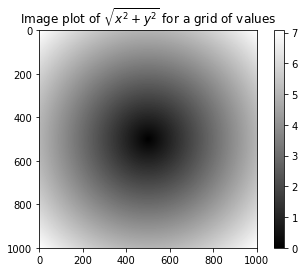

In [87]:
# z 可视化
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

plt.show()

### 将条件逻辑表述为数组运算
**numpy.where**函数是三元表达式**x if condition else y**的矢量化版本。

假设我们有一个布尔数组和两个值数组：

In [88]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

# 假设我们想要根据cond中的值选取xarr和yarr的值：当cond中的值为True时，选取xarr的值，
# 否则从yarr中选取。列表推导式的写法应该如下所示：

result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

result

[1.1, 2.2, 1.3, 1.4, 2.5]

第一，它对大数组的处理速度不是很快（因为所有工作都是由纯Python完成的）。
第二，无法用于**多维数组**。若使用*np.where*，则可以将该功能写得非常简洁：

In [89]:
result = np.where(cond, xarr, yarr)

result

array([1.1, 2.2, 1.3, 1.4, 2.5])

np.where的第二个和第三个参数不必是数组，它们都可以是标量值。
在数据分析工作中，where通常用于根据另一个数组而产生一个**新的数组**。
假设有一个由随机数据组成的矩阵，你希望将所有正值替换为2，将所有负值替换为－2。
若利用np.where，则会非常简单：

In [90]:
arr = np.random.randn(4, 4)

arr

array([[-0.67126931, -0.11156651, -1.07873339, -0.54958058],
       [-1.21338309, -0.48779827,  0.99476055,  0.45229199],
       [-0.04170625,  1.172426  , -0.70376304,  0.37562575],
       [-0.57424823,  0.18815025,  0.62958876, -1.02553425]])

In [91]:
arr>0

array([[False, False, False, False],
       [False, False,  True,  True],
       [False,  True, False,  True],
       [False,  True,  True, False]])

In [92]:
np.where(arr > 0, 2, -2)

array([[-2, -2, -2, -2],
       [-2, -2,  2,  2],
       [-2,  2, -2,  2],
       [-2,  2,  2, -2]])

In [93]:
# 使用np.where，可以将标量和数组结合起来。
# 例如，我可用常数2替换arr中所有正的值：
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-0.67126931, -0.11156651, -1.07873339, -0.54958058],
       [-1.21338309, -0.48779827,  2.        ,  2.        ],
       [-0.04170625,  2.        , -0.70376304,  2.        ],
       [-0.57424823,  2.        ,  2.        , -1.02553425]])

### 数学和统计方法
可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。
**sum**、**mean**以及**标准差std**等**聚合计算**（aggregation，通常叫做约简（reduction））
既可以当做数组的实例方法调用，也可以当做顶级NumPy函数使用。

In [94]:
# 这里，我生成了一些正态分布随机数据，然后做了聚类统计
arr = np.random.randn(5, 4)
# instance method
arr.mean()

# top method
np.mean(arr)

arr.sum()

mean和sum这类的函数可以接受一个axis选项参数，用于计算该轴向上的统计值，最终结果是一个少一维的数组：

In [95]:
# row 
arr.mean(axis=1)

array([ 0.91579986, -0.03532731,  1.11791282,  0.54731141,  0.26790485])

In [99]:
# column
arr.sum(axis=0)

array([5.19527927, 1.93855267, 0.10956583, 4.0110087 ])

其他如**cumsum**和cumprod之类的方法则不聚合，而是产生一个由中间结果组成的数组：

In [100]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [101]:
# 在多维数组中，累加函数（如cumsum）返回的是同样大小的数组，
# 但是会根据每个低维的切片沿着标记轴计算部分聚类：
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

arr.cumsum(axis=0)


array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [102]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

全部的基本数组统计方法。
[pic](https://upload-images.jianshu.io/upload_images/7178691-a6c6df3ca8e0b98e.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/700)

### 用于布尔型数组的方法

在上面这些方法中，布尔值会被强制转换为1（True）和0（False）。
因此，sum经常被用来对布尔型数组中的True值计数：

In [103]:
arr = np.random.randn(100)

(arr > 0).sum()

51

另外还有两个方法any和all，它们对布尔型数组非常有用。
**any**用于测试数组中是否存在一个或多个True，而**all**则检查数组中所有值是否都是True：
这两个方法也能用于非布尔型数组，所有非0元素将会被当做True。

In [105]:
bools = np.array([False, False, True, False])

bools.any()

True

In [106]:
 bools.all()

False

In [107]:
# 排序
arr = np.random.randn(6)

arr.sort()

arr

array([-0.55561079, -0.4209641 , -0.39671425,  0.35289532,  0.48454691,
        1.36144644])

In [110]:
# axis=1
arr = np.random.randn(2, 5)
arr.sort(1)
arr

array([[-1.22789067, -0.20356804,  0.29033015,  0.77487093,  1.58929885],
       [-0.55911692, -0.17348966, -0.13878567,  0.09607579,  0.7645236 ]])

顶级方法np.sort返回的是数组的**已排序副本**，而**就地排序**则会修改数组本身。
计算数组分位数最简单的办法是对其进行排序，然后选取特定位置的值：

In [111]:
large_arr = np.random.randn(1000)

large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.5855832136168493

更多关于NumPy排序方法以及诸如**间接排序**之类的高级技术，请参阅附录A。
在pandas中还可以找到一些其他跟排序有关的数据操作（比如根据一列或多列对表格型数据进行排序）。